Dzar Bela Hanifa
<br>
13515007
<br>
Laporan TBD Tugas 1 - Instagram
<br>
Bahasa : Python 2.7

In [6]:
%matplotlib inline


from bs4 import BeautifulSoup
import requests

import pandas as pd
import matplotlib.pyplot as plt

data = open("dataInsta.txt", "r")
insta_user = []
for line in data:
    insta_user.append(line.replace("\r\n", ""))

Pertama-tama data user Instagram akan dibaca terlebih dulu dari dataInsta.txt lalu dibersihkan dari karakter yang tidak relevan.

In [7]:
page_list = []

for user in insta_user:
    page_list.append("https://www.instagram.com" + user)


Setelah itu, daftar <i>page</i> tiap-tiap <i>user</i> akan disimpan ke dalam <i>list</i>

In [11]:
followers = []
following = []
posts = []
valid_user = []

for (raw_page, user) in zip(page_list, insta_user):
    page = requests.get(raw_page, timeout=5)
    print (page)
    if (page.status_code == 200) : #Jika request berhasil
        soup = BeautifulSoup(page.content, 'html.parser')
        page_data = soup.find('meta', {'name': 'description'})['content'].split('-')
        page_data = page_data[0].split(", ")
        
        valid_user.append(user.split("/")[1])
        for elements in page_data:
            elements = elements.split(' ')
            if elements > 0:
                if elements[1] == "Followers":
                    if elements[0][-1] == "k":
                        elements[0] = elements[0][:-1]
                        followers.append(int(elements[0].replace(".", "")) * 1000)
                    else:
                        followers.append(int(elements[0].replace(",","")))
                if elements[1] == "Following":
                    if elements[0][-1] == "k":
                        elements[0] = elements[0][:-1]
                        following.append(int(elements[0].replace(".", "")) * 1000)
                    else:
                        following.append(int(elements[0].replace(",","")))
                if elements[1] == "Posts":
                    if elements[0][-1] == "k":
                        elements[0] = elements[0][:-1]
                        posts.append(int(elements[0].replace(".", "")) * 1000)
                    else:
                        posts.append(int(elements[0].replace(",","")))
            
# print followers

<Response [404]>
<Response [404]>
<Response [200]>
<Response [404]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [404]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [404]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200

Dengan library <i>request</i> data terkait <i>page</i> setiap <i>user</i> akan diperoleh. Ternyata beberapa <i>user</i> telah mengganti nama akun / menghapus instagramnya. Oleh karena itu jumlah <i>request</i> yang berhasil tidak sebanyak jumlah <i>username</i> yang tersedia.

Dari tiap <i> page </i> yang ada, saya tertarik dengan data terkait jumlah <i>follower</i>, <i>following</i>, serta <i>post</i>. Data-data tersebut saya dapatkan dengan bantuan library BeautifulSoup

In [12]:
df = pd.DataFrame()
df['username'] = valid_user
df['followers'] = followers
df['following'] = following
df['posts'] = posts
df.describe()

,followers,following,posts
count,3.760000e+02,376.000000,376.000000
mean,5.746859e+03,431.851064,47.539894
std,5.758334e+04,728.037138,166.730324
min,0.000000e+00,0.000000,0.000000
25%,7.300000e+01,78.500000,2.000000
50%,3.055000e+02,215.000000,10.000000
75%,8.857500e+02,435.250000,34.250000
max,1.019000e+06,6894.000000,2468.000000


In [13]:
#Largest and smallest value

print "largest value in followers:", max(df['followers'])
print "smallest value in followers:", min(df['followers'])
print "largest value in following:", max(df['following'])
print "smallest value in following:", min(df['following'])
print "largest value in posts:", max(df['posts'])
print "smallest value in posts:", min(df['posts'])

largest value in followers: 1019000
smallest value in followers: 0
largest value in following: 6894
smallest value in following: 0
largest value in posts: 2468
smallest value in posts: 0


In [14]:
#Second Largest and Second Smallest value in num_friends

print "second largest value in followers", sorted(list(set(df['followers'])), reverse=True)[1]
print "second smallest value in followers", sorted(list(set(df['followers']))) [1]
print "second largest value in following", sorted(list(set(df['following'])), reverse=True)[1]
print "second smallest value in following", sorted(list(set(df['following']))) [1]
print "second largest value in posts", sorted(list(set(df['posts'])), reverse=True)[1]
print "second smallest value in posts", sorted(list(set(df['posts']))) [1]

second largest value in followers 358000
second smallest value in followers 1
second largest value in following 5538
second smallest value in following 1
second largest value in posts 1566
second smallest value in posts 1


In [16]:
#Mean of data

print "mean of the followers ", df['followers'].mean()
print "mean of the following ", df['following'].mean()
print "mean of the posts ", df['posts'].mean()

mean of the followers  5746.859042553191
mean of the following  431.8510638297872
mean of the posts  47.53989361702128


In [17]:
#Median of data

print "median of the followers ",  df['followers'].median()
print "median of the following ",  df['following'].median()
print "median of the posts ",  df['posts'].median()

median of the followers  305.5
median of the following  215.0
median of the posts  10.0


In [20]:
#Quantile of data

print "Followers"
print "0.1 Quantile : ", df['followers'].quantile(q=0.1)
print "0.25 Quantilea : ", df['followers'].quantile(q=0.25)
print "0.75 Quantile : ", df['followers'].quantile(q=0.75)
print "0.90 Quantile : ", df['followers'].quantile(q=0.90)
print ("\n")
print "Following"
print "0.1 Quantile : ", df['following'].quantile(q=0.1)
print "0.25 Quantilea : ", df['following'].quantile(q=0.25)
print "0.75 Quantile : ", df['following'].quantile(q=0.75)
print "0.90 Quantile : ", df['following'].quantile(q=0.90)
print ("\n")
print "Posts"
print "0.1 Quantile : ", df['posts'].quantile(q=0.1)
print "0.25 Quantilea : ", df['posts'].quantile(q=0.25)
print "0.75 Quantile : ", df['posts'].quantile(q=0.75)
print "0.90 Quantile : ", df['posts'].quantile(q=0.90)

 Followers
0.1 Quantile :  16.0
0.25 Quantilea :  73.0
0.75 Quantile :  885.75
0.90 Quantile :  2110.0


Following
0.1 Quantile :  31.5
0.25 Quantilea :  78.5
0.75 Quantile :  435.25
0.90 Quantile :  971.0


Posts
0.1 Quantile :  0.0
0.25 Quantilea :  2.0
0.75 Quantile :  34.25
0.90 Quantile :  99.5


In [21]:
#Mode of data

print ("Followers")
for elements in df['followers'].mode():
    print elements
print ("\n")
print ("Following")
for elements in df['following'].mode():
    print elements
print ("\n")
print ("Posts")
for elements in df['posts'].mode():
    print elements

Followers
13


Following
18
149


Posts
0


In [22]:
#Data range

print "range of followers ", max(df['followers']) - min(df['followers'])
print "range of following ", max(df['following']) - min(df['following'])
print "range of posts ", max(df['posts']) - min(df['posts'])

range of followers  1019000
range of following  6894
range of posts  2468


In [23]:
#Variance of data

print "Variance of followers ", df['followers'].var()
print "Variance of following ", df['following'].var()
print "Variance of posts ", df['posts'].var()

Variance of followers  3315840662.292079
Variance of following  530038.0737588652
Variance of posts  27799.001070921993


In [26]:
#Standar deviation of data

print "standard deviation of followers ", df['followers'].std()
print "standard deviation of following ", df['following'].std()
print "standard deviation of posts ", df['posts'].std()

standard deviation of followers  57583.336672097066
standard deviation of following  728.0371376233943
standard deviation of posts  166.7303243891824


In [27]:
#Interquartile range of data

print "IQR of followers ", df['followers'].quantile(q=0.75) - df['followers'].quantile(q=0.25)
print "IQR of following ", df['following'].quantile(q=0.75) - df['following'].quantile(q=0.25)
print "IQR of posts ", df['posts'].quantile(q=0.75) - df['posts'].quantile(q=0.25)

IQR of followers  812.75
IQR of following  356.75
IQR of posts  32.25


In [31]:
#Covariance between data

print "covariance between following and followers ", df['following'].cov(df["followers"])
print "covariance between following and posts ", df['following'].cov(df["posts"])
print "covariance between posts and followers ", df['posts'].cov(df["followers"])

covariance between following and followers  1574227.7469503544
covariance between following and posts  27783.459290780134
covariance between posts and followers  2572771.5349716316


In [34]:
#Correlation between data

print "correlation between following and followers ", df['following'].corr(df["followers"])
print "correlation between following and posts ", df['following'].corr(df["posts"])
print "correlation between posts and followers ", df['posts'].corr(df["followers"])

correlation between following and followers  0.0375506278530271
correlation between following and posts  0.2288854519914451
correlation between posts and followers  0.2679722362187483


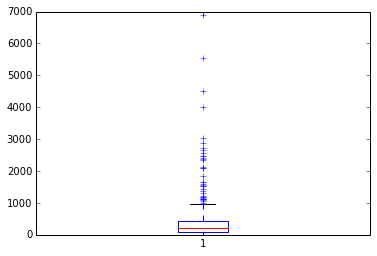

In [35]:
plt.boxplot(df['following'])
plt.show()

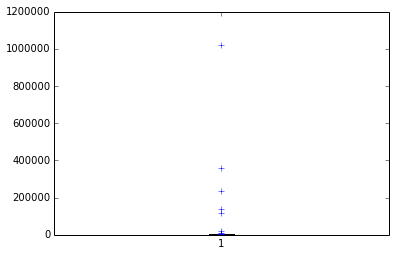

In [36]:
plt.boxplot(df['followers'])
plt.show()

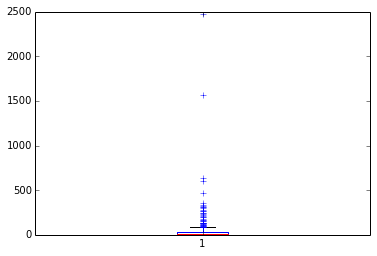

In [37]:
plt.boxplot(df['posts'])
plt.show()

0.0375506278530271


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


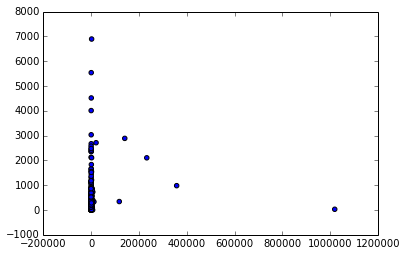

In [38]:
print df['followers'].corr(df["following"])
plt.scatter(df['followers'], df['following'])
plt.show()


0.2288854519914451


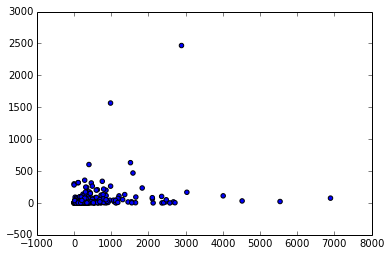

In [40]:
print df['following'].corr(df["posts"])
plt.scatter(df['following'], df['posts'])
plt.show()


0.2679722362187483


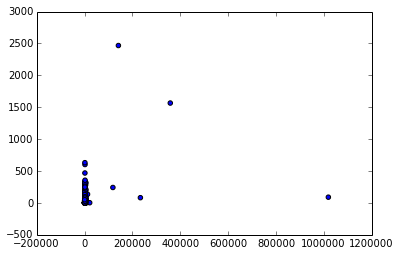

In [41]:
print df['followers'].corr(df["posts"])
plt.scatter(df['followers'], df['posts'])
plt.show()


Dari serangkaian deskripsi data di atas, ada <i> insight </i> yang dapat kita peroleh.
<i>Insight </i> tersebut adalah Jumlah <i>followers</i> dan <i>following</i> tidak memiliki korelasi yang signifikan.
Berdasarkan penghitungan, korelasi antara kedua kolom tersebut hanya 0.0375506278530271.
Menurut pendapat pribadi saya sebagai pengguna media sosial, hal ini mungkin disebabkan karena pengguna yang memiliki jumlah followers sangat banyak (artis) biasanya memiliki jumlah following yang sangat sedikit. Sementera itu pengguna yang memiliki jumlah following sangat banyak (biasanya bot) memiliki followers yang sangat sedikit. Pengguna normal biasanya memiliki jumlah <i>followers</i> dan <i>following</i> yang seimbang karena medsos digunakan sebagaimana mestinya (bukan untuk media promosi -> followers banyak seperti artis dan juga bukan untuk mem-post spam -> follow banyak akun seperti bot)

<i>Insight</i> lain yang dapat diperoleh adalah jumlah <i>following</i> dan <i>followers</i> berkorelasi positif terhadap jumlah <i>posts</i>. Hal ini berarti semakin aktif <i>user</i> dalam hal <i>follow</i>-<i>memfollow</i>, maka semakin aktif pula ia dalam membuat <i>post</i>.